# **PARTE I: FAMILIARIZÁNDONOS CON LA BASE EPH Y LIMPIEZA**

## *En esta primera parte del trabajo nos centramos en unificar las bases del año 2004 y 2024 filtrando la región elegida para trabajar (NEA) y hacemos una limpieza de la base verificando la cantidad valores faltantes y valores sin sentido.*

In [1]:
import pandas as pd
import os

os.chdir(r"C:\Users\andre\OneDrive\Escritorio\Big Data FCE 2025\TP 2")

# Carga de las bases de datos
df_2004 = pd.read_stata('usu_individual_T104.dta', convert_categoricals=False) 
df_2024 = pd.read_excel('usu_individual_T124.xlsx')
##Le agrego el comando 'convert_categoricals=False' al leer el archivo .dta para que no convierta
#automáticamente las variables categóricas de Stata en objetos tipo categoría y, en su lugar, devuelva
#los valores numéricos codificados para que todas las variables de ambas bases tengan el formato correcto y unificado.

# Unificamos nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

# Obtenemos columnas comunes para trabajar con los mismos datos
columnas_comunes = df_2004.columns.intersection(df_2024.columns)

# Filtramos ambas bases por esas columnas
df_2004_filtrado = df_2004[columnas_comunes]
df_2024_filtrado = df_2024[columnas_comunes]

# Combinamos las bases
df_combinado = pd.concat([df_2004_filtrado, df_2024_filtrado], ignore_index=True)

# Filtramos por la región NEA (codificado con el número 41 según el Diseño de registros de la base Personas/Individual)
df_eph_nea = df_combinado[df_combinado['REGION'] == 41]

# Guardamos el archivo con solo la región NEA para verificar
df_eph_nea.to_excel('EPH_NEA_2004_2024.xlsx', index=False)

print("Archivo de la región NEA guardado como 'EPH_NEA_2004_2024.xlsx'")

Archivo de la región NEA guardado como 'EPH_NEA_2004_2024.xlsx'


In [2]:
# Hacemos el listado de las 15 variables de interés
variables = ['ANO4', 'REGION', 'AGLOMERADO', 'PONDERA', 'CH04', 'CH06',
             'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04A',
             'P21', 'RDECINDR', 'P47T', 'IPCF']

# Creamos tabla de valores faltantes por año (usando 'ANO4' como indicador de año)
faltantes_por_año = df_eph_nea[variables].groupby('ANO4').apply(lambda x: x.isna().sum())

# Transponemos para ver las variables como filas
faltantes_tabla = faltantes_por_año.transpose()

# Mostramos la tabla
print("📋 Cantidad de valores faltantes por variable y año:")
print(faltantes_tabla)

📋 Cantidad de valores faltantes por variable y año:
ANO4        2004.0  2024.0
ANO4             0       0
REGION           0       0
AGLOMERADO       0       0
PONDERA          0       0
CH04             0       0
CH06             0       0
NIVEL_ED         0       0
ESTADO           0       0
CAT_OCUP         0       0
CAT_INAC         0       0
PP04A            0    2739
P21              0       0
RDECINDR         0       0
P47T             0       6
IPCF             0       0


C:\Users\andre\AppData\Local\Temp\ipykernel_1888\1332601676.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faltantes_por_año = df_eph_nea[variables].groupby('ANO4').apply(lambda x: x.isna().sum())


In [3]:
# Lista de variables de interés
variables = ['ANO4', 'REGION', 'AGLOMERADO', 'PONDERA', 'CH04', 'CH06',
             'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04A',
             'P21', 'RDECINDR', 'P47T', 'IPCF']

# Copiamos solo las columnas de interés
df = df_eph_nea[variables].copy()

# Codificaciones de no respuesta comunes en EPH
valores_invalidos_generales = [-1, -9, 9, 99, 999, 999999]

# Reporte de limpieza
reporte_limpieza = {}
filas_iniciales = df.shape[0]

# Limpieza por cada variable (sin eliminar toda la fila)
for var in variables:
    filas_antes = df.shape[0]
    
    if var == 'CH04':  # Edad, no eliminar 9 ni 99
        df[var] = df[var].apply(lambda x: None if x == -9 or x == -1 else x)  # Solo eliminar -9 y -1
    else:
        df[var] = df[var].apply(lambda x: None if x in valores_invalidos_generales else x)  # Eliminar codificaciones de no respuesta
    
    # Eliminar valores NaN en esa variable (sin eliminar fila completa)
    df[var] = df[var].dropna()

    filas_despues = df.shape[0]
    filas_eliminadas = filas_antes - filas_despues
    reporte_limpieza[var] = filas_eliminadas

# Agregar resumen total
filas_finales = df.shape[0]
reporte_limpieza['TOTAL'] = filas_iniciales - filas_finales

# Mostrar el reporte
print("🧾 Reporte de limpieza de variables:")
for var, eliminadas in reporte_limpieza.items():
    print(f"{var}: {eliminadas} valores eliminados")

print(f"\n🔍 Total filas iniciales: {filas_iniciales}")
print(f"✅ Total filas finales: {filas_finales}")
print(f"🗑️ Total valores eliminados: {filas_iniciales - filas_finales}")


🧾 Reporte de limpieza de variables:
ANO4: 0 valores eliminados
REGION: 0 valores eliminados
AGLOMERADO: 0 valores eliminados
PONDERA: 0 valores eliminados
CH04: 0 valores eliminados
CH06: 0 valores eliminados
NIVEL_ED: 0 valores eliminados
ESTADO: 0 valores eliminados
CAT_OCUP: 0 valores eliminados
CAT_INAC: 0 valores eliminados
PP04A: 0 valores eliminados
P21: 0 valores eliminados
RDECINDR: 0 valores eliminados
P47T: 0 valores eliminados
IPCF: 0 valores eliminados
TOTAL: 0 valores eliminados

🔍 Total filas iniciales: 10193
✅ Total filas finales: 10193
🗑️ Total valores eliminados: 0


# **PARTE II: PRIMER ANÁLISIS EXPLORATORIO**

### 3. Realizamos un gráfico de barras que muestra la composición por sexo para el año 2004 y 2024

C:\Users\andre\AppData\Local\Temp\ipykernel_1888\4259814302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eph_nea['SEXO'] = df_eph_nea['CH04'].map({1: 'Varón', 2: 'Mujer'})


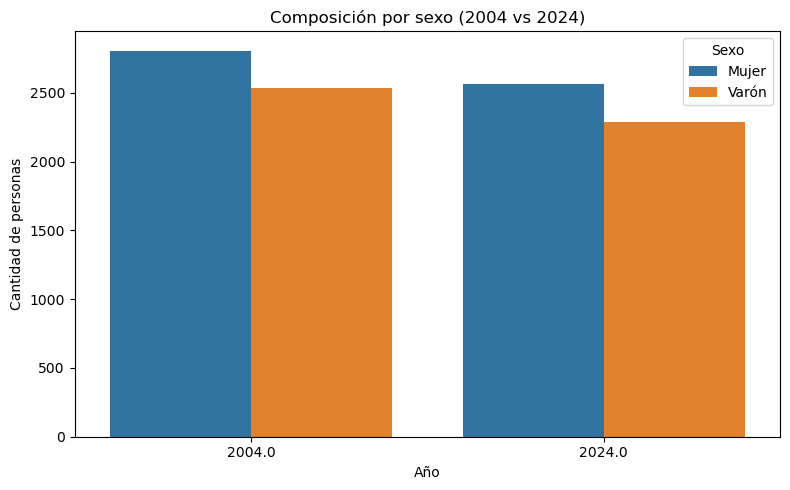

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapear los códigos de sexo a etiquetas
df_eph_nea['SEXO'] = df_eph_nea['CH04'].map({1: 'Varón', 2: 'Mujer'})
#Código según Diseño de registros...

# Agrupar por año y sexo
sexo_por_año = df_eph_nea.groupby(['ANO4', 'SEXO']).size().reset_index(name='Cantidad')

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=sexo_por_año, x='ANO4', y='Cantidad', hue='SEXO')

plt.title('Composición por sexo (2004 vs 2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

### 4. Matriz de correlación para los años 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF.

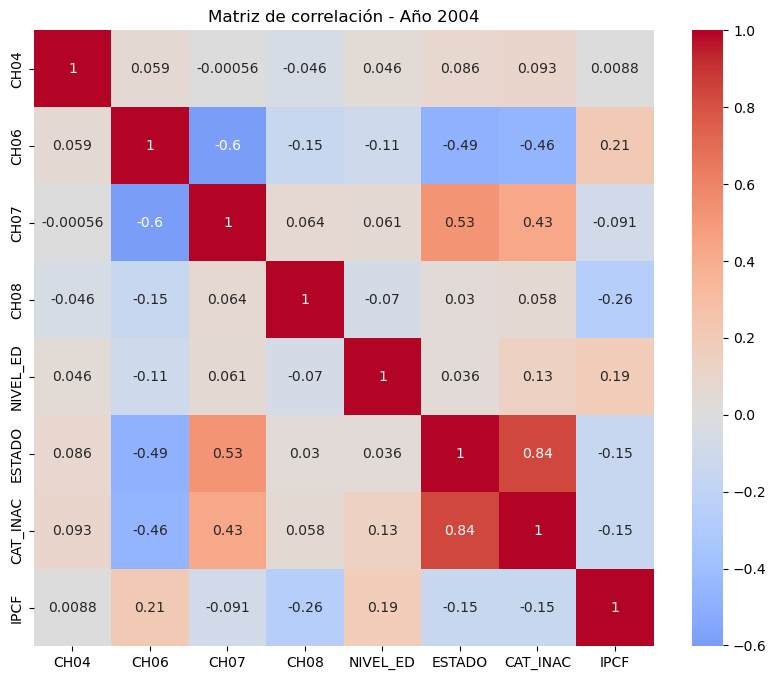

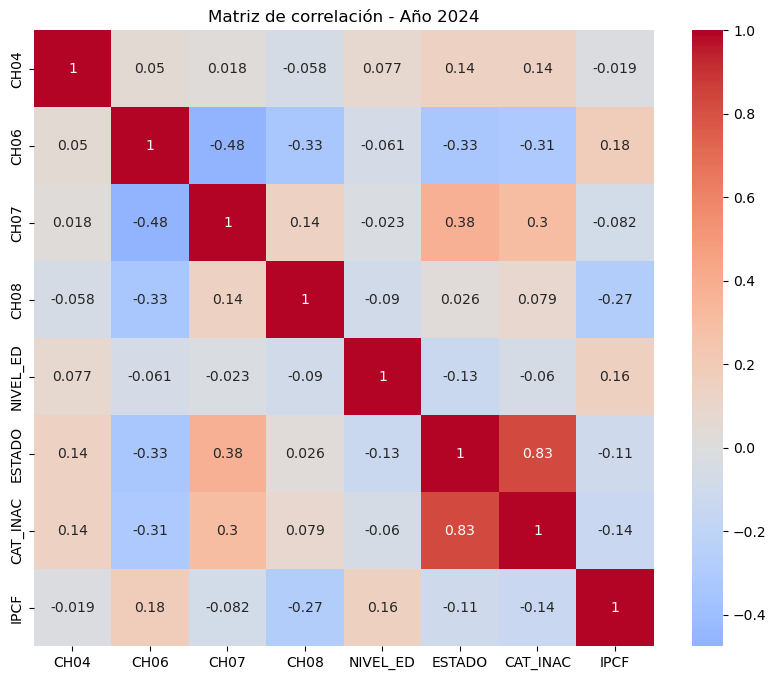

In [5]:
# Variables a analizar
vars_correlacion = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

def matriz_correlacion(df, año):
    df_año = df[df['ANO4'] == año][vars_correlacion].dropna()
    corr = df_año.corr(numeric_only=True)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Matriz de correlación - Año {año}')
    plt.show()

# Correlación para 2004
matriz_correlacion(df_eph_nea, 2004)

# Correlación para 2024
matriz_correlacion(df_eph_nea, 2024)


# **PARTE III: CONOCIENDO A LOS OCUPADOS Y DESOCUPADOS**

## *En esta sección, a partir de distintos análisis, veremos resultados para la región NEA comparando 2004 con 2024.*

### 5. ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [6]:
# Mapeo de estado laboral
estado_labels = {0: 'Entrevista individual no realizada', 1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo', 4: 'Menor de 10 años'}
#Código según Diseño de registros...

# Agrupar y contar cantidad de personas por ESTADO y ANO4
conteo_estado = df_eph_nea.groupby(['ANO4', 'ESTADO']).size().unstack().rename(columns=estado_labels)

print("Cantidad de personas por estado y año:")
print(conteo_estado)

# Calculamos la media de IPCF por estado y año
ipcf_estado = df_eph_nea.groupby(['ANO4', 'ESTADO'])['IPCF'].mean().unstack().rename(columns=estado_labels)

print("\n Media de IPCF por estado y año:")
print(ipcf_estado)

Cantidad de personas por estado y año:
ESTADO  Entrevista individual no realizada  Ocupado  Desocupado  Inactivo  \
ANO4                                                                        
2004.0                                   5     1789         215      2303   
2024.0                                   6     2111         127      1981   

ESTADO  Menor de 10 años  
ANO4                      
2004.0              1031  
2024.0               625  

 Media de IPCF por estado y año:
ESTADO  Entrevista individual no realizada       Ocupado    Desocupado  \
ANO4                                                                     
2004.0                          126.128571     244.71095    148.137200   
2024.0                            0.000000  144161.96352  85540.112598   

ESTADO       Inactivo  Menor de 10 años  
ANO4                                     
2004.0     196.079148        137.635006  
2024.0  119954.723872      97666.983584  


### 6. ¿Cuántas personas no respondieron cuál es su condición de actividad?

In [8]:
# Creamos base con quienes respondieron su condición de actividad
respondieron = df_eph_nea[df_eph_nea['ESTADO'].notna() & (df_eph_nea['ESTADO'] != 0)]

# Creamos base con quienes NO respondieron (ESTADO == 0 o NaN)
norespondieron = df_eph_nea[(df_eph_nea['ESTADO'].isna()) | (df_eph_nea['ESTADO'] == 0)]

# Muestra cantidades
print(f" Respondieron: {respondieron.shape[0]} personas")
print(f" No respondieron: {norespondieron.shape[0]} personas")

 Respondieron: 10182 personas
 No respondieron: 11 personas


### 7. Composición por PEA para 2004 y 2024

C:\Users\andre\AppData\Local\Temp\ipykernel_1888\3997028099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = respondieron['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)


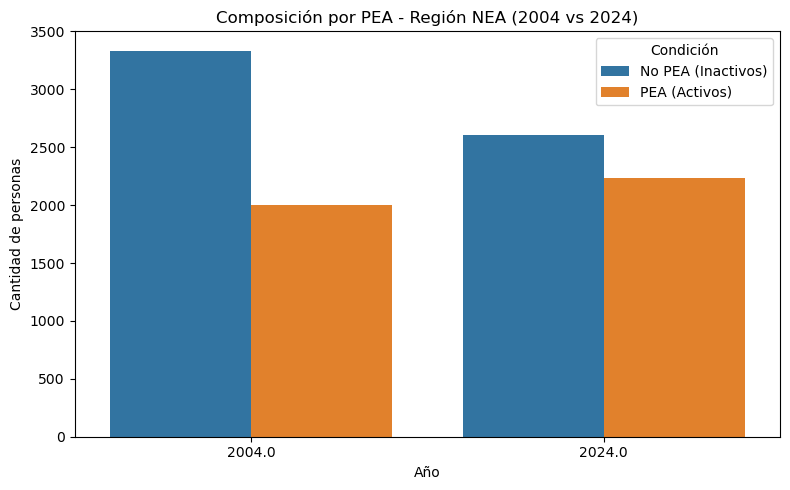

In [9]:
# Creamos columna PEA (1 si ocupados o desocupados, 0 si inactivos)
respondieron['PEA'] = respondieron['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)

# Agrupamos para el gráfico
pea_counts = respondieron.groupby(['ANO4', 'PEA']).size().reset_index(name='Cantidad')

# Etiquetas legibles
pea_counts['PEA'] = pea_counts['PEA'].map({1: 'PEA (Activos)', 0: 'No PEA (Inactivos)'})

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=pea_counts, x='ANO4', y='Cantidad', hue='PEA')
plt.title('Composición por PEA - Región NEA (2004 vs 2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.legend(title='Condición')
plt.tight_layout()
plt.show()


### 8. Comparación PET - PEA

C:\Users\andre\AppData\Local\Temp\ipykernel_1888\4211085824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)


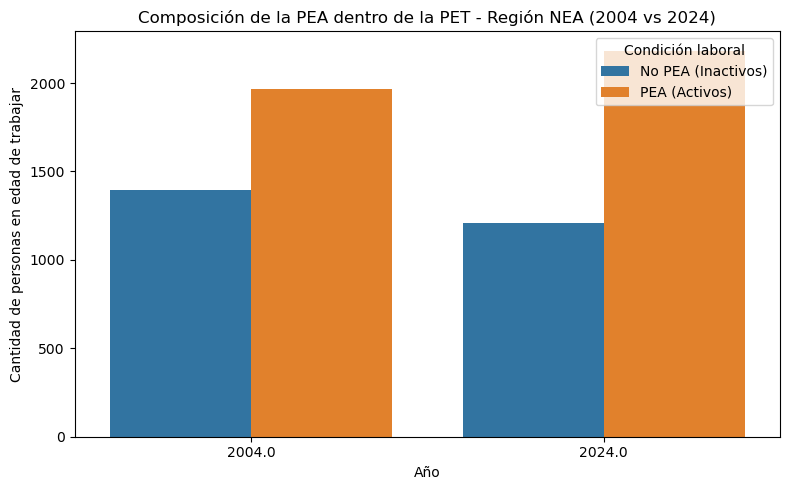

In [11]:
# Creamos la variable PET: 1 si edad entre 15 y 65 inclusive
respondieron['PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)
# Filtra solo quienes están en PET
pet_df = respondieron[respondieron['PET'] == 1]

# Agrupa por año y condición PEA
pea_pet_counts = pet_df.groupby(['ANO4', 'PEA']).size().reset_index(name='Cantidad')
pea_pet_counts['PEA'] = pea_pet_counts['PEA'].map({1: 'PEA (Activos)', 0: 'No PEA (Inactivos)'})

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=pea_pet_counts, x='ANO4', y='Cantidad', hue='PEA')
plt.title('Composición de la PEA dentro de la PET - Región NEA (2004 vs 2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas en edad de trabajar')
plt.legend(title='Condición laboral')
plt.tight_layout()
plt.show()

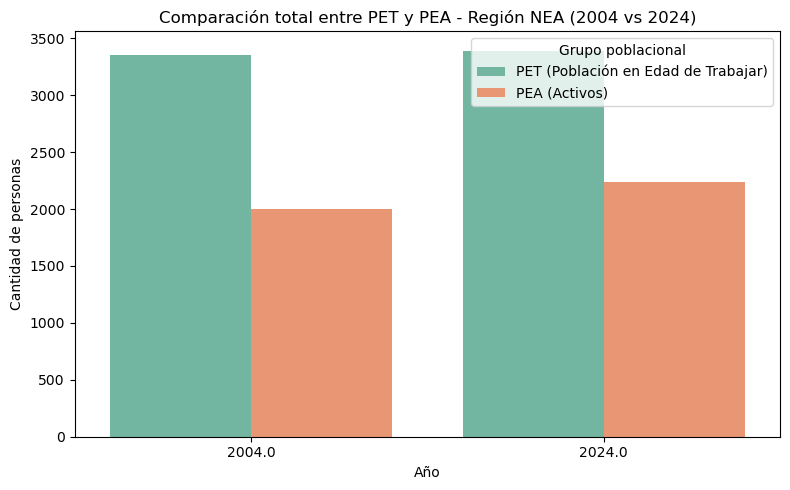

In [12]:
#Total de personas en edad de trabajar (PET = 1), por año
pet_totales = respondieron[respondieron['PET'] == 1].groupby('ANO4').size().reset_index(name='Cantidad')
pet_totales['Tipo'] = 'PET (Población en Edad de Trabajar)'

#Total de personas en la PEA (ocupados o desocupados), por año
pea_totales = respondieron[respondieron['PEA'] == 1].groupby('ANO4').size().reset_index(name='Cantidad')
pea_totales['Tipo'] = 'PEA (Activos)'

#Unimos ambos dataframes
comparacion = pd.concat([pet_totales, pea_totales], ignore_index=True)

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=comparacion, x='ANO4', y='Cantidad', hue='Tipo', palette='Set2')
plt.title('Comparación total entre PET y PEA - Región NEA (2004 vs 2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.legend(title='Grupo poblacional')
plt.tight_layout()
plt.show()


### 9. ¿Cuántas personas están desocupadas en 2004 vs. 2024

In [16]:
# Creamos la columna 'desocupado': 1 si ESTADO es 2, sino 0
respondieron['desocupado'] = respondieron['ESTADO'].apply(lambda x: 1 if x == 2 else 0)

# Agrupamos por año y sumamos la columna 'desocupado'
desocupados_por_año = respondieron.groupby('ANO4')['desocupado'].sum().reset_index()

# Resultado
print(desocupados_por_año)


     ANO4  desocupado
0  2004.0         215
1  2024.0         127


C:\Users\andre\AppData\Local\Temp\ipykernel_1888\4073087926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = respondieron['ESTADO'].apply(lambda x: 1 if x == 2 else 0)


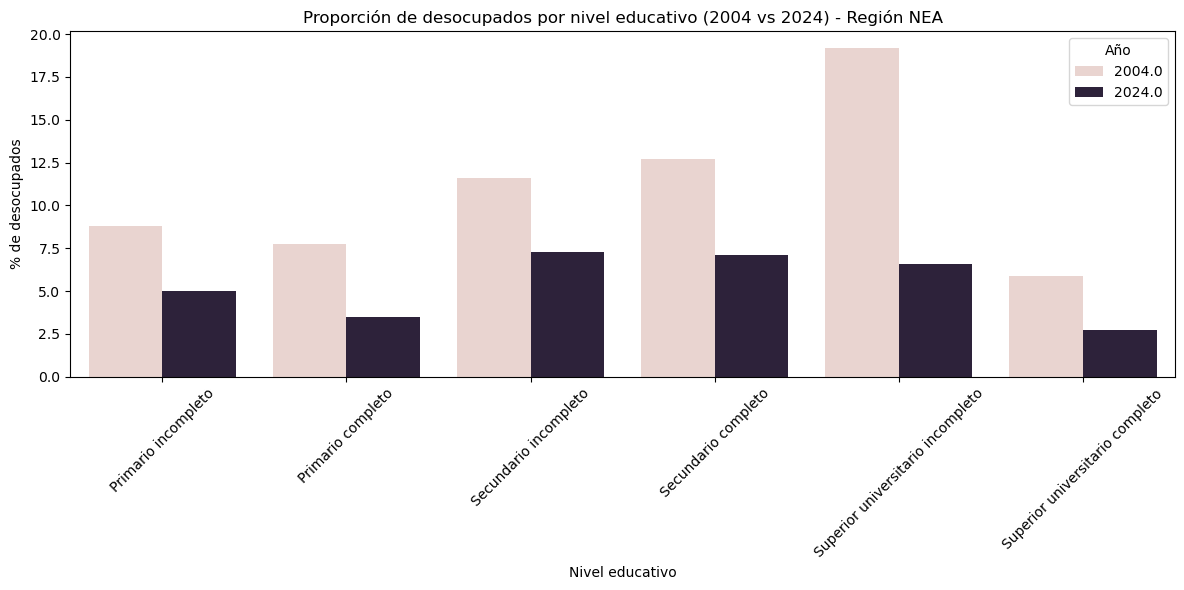

In [17]:
### a. ¿Hubo cambios de desocupados por nivel educativo?
# Filtrar solo quienes están en la PEA (ocupados + desocupados)
pea_df = respondieron[respondieron['PEA'] == 1]

# Agrupamos por año y nivel educativo
proporcion_desocupados = pea_df.groupby(['ANO4', 'NIVEL_ED'])['desocupado'].mean().reset_index()

# Convertimos proporciones a porcentajes
proporcion_desocupados['porcentaje_desocupado'] = proporcion_desocupados['desocupado'] * 100

niveles_dict = {
    1: 'Primario incompleto',
    2: 'Primario completo',
    3: 'Secundario incompleto',
    4: 'Secundario completo',
    5: 'Superior universitario incompleto',
    6: 'Superior universitario completo',
    9: 'Ns/Nr'
}

proporcion_desocupados['nivel_educativo'] = proporcion_desocupados['NIVEL_ED'].map(niveles_dict)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=proporcion_desocupados, x='nivel_educativo', y='porcentaje_desocupado', hue='ANO4')
plt.title('Proporción de desocupados por nivel educativo (2004 vs 2024) - Región NEA')
plt.xlabel('Nivel educativo')
plt.ylabel('% de desocupados')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_1888\3553235963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['grupo_edad'] = pd.cut(respondieron['CH06'], bins=bins, labels=labels, right=False)
C:\Users\andre\AppData\Local\Temp\ipykernel_1888\3553235963.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion_edad = respondieron.groupby(['ANO4', 'grupo_edad'])['desocupado'].mean().reset_index()


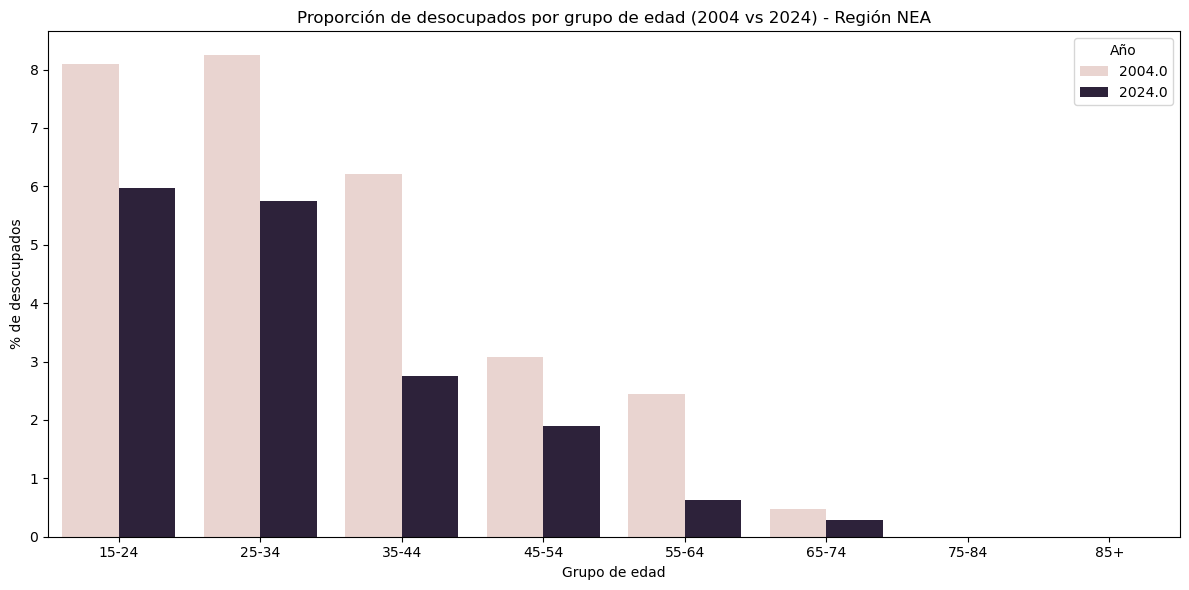

In [21]:
### b. ¿Hubo cambios de desocupados por edad?
#Hicimos la agrupación de 10 años a partir de los 15 años de edad, cuando empieza la PET
bins = [15, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
respondieron['grupo_edad'] = pd.cut(respondieron['CH06'], bins=bins, labels=labels, right=False)

proporcion_edad = respondieron.groupby(['ANO4', 'grupo_edad'])['desocupado'].mean().reset_index()
proporcion_edad['porcentaje'] = proporcion_edad['desocupado'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=proporcion_edad, x='grupo_edad', y='porcentaje', hue='ANO4')
plt.title('Proporción de desocupados por grupo de edad (2004 vs 2024) - Región NEA')
plt.xlabel('Grupo de edad')
plt.ylabel('% de desocupados')
plt.legend(title='Año')
plt.tight_layout()
plt.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_1888\3386491419.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['AGLOMERADO_NOMBRE'] = respondieron['AGLOMERADO'].map(mapeo_aglomerados)


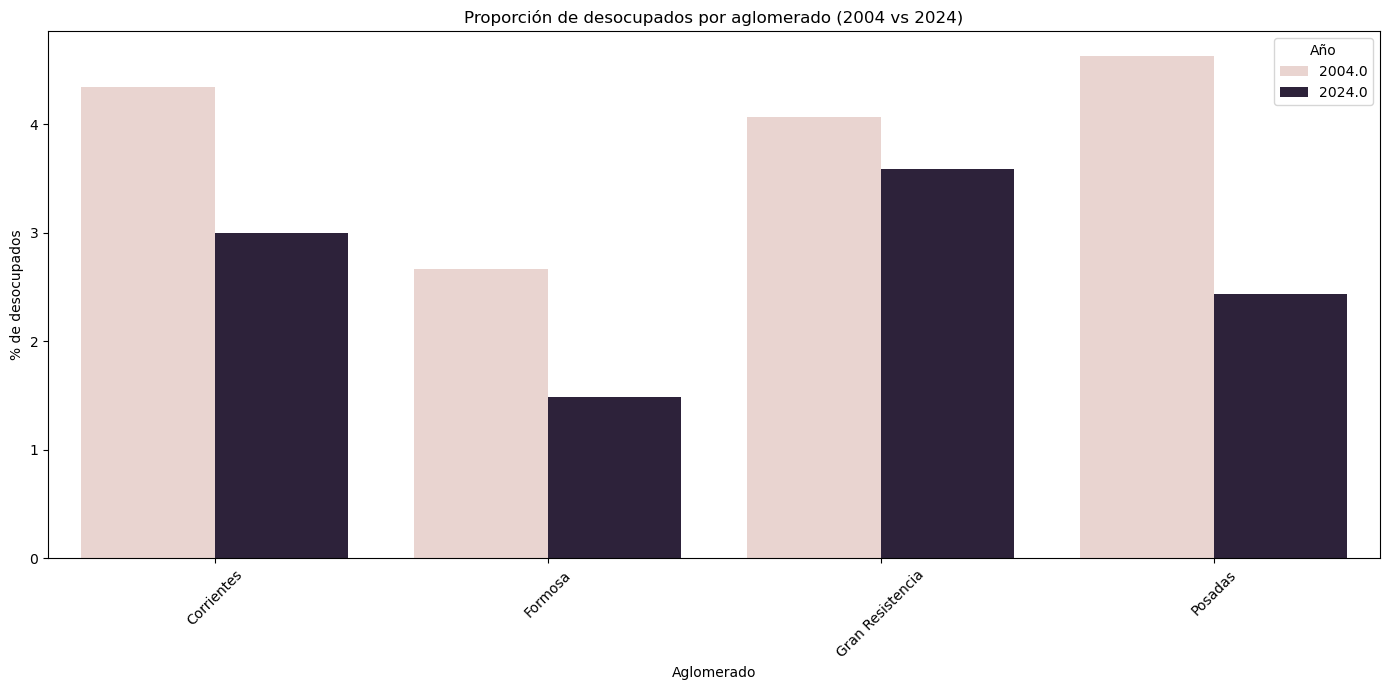

In [22]:
# Diccionario de mapeo de códigos a nombres
mapeo_aglomerados = {
    7: 'Posadas',
    8: 'Gran Resistencia',
    12: 'Corrientes',
    15: 'Formosa'
}

# Reemplazamos los códigos por los nombres en la columna 'AGLOMERADO'
respondieron['AGLOMERADO_NOMBRE'] = respondieron['AGLOMERADO'].map(mapeo_aglomerados)

# Agrupación por aglomerado y año para calcular la proporción de desocupados
proporcion_desocupados_aglomerado = respondieron.groupby(['ANO4', 'AGLOMERADO_NOMBRE'])['desocupado'].mean().reset_index()

# Calculamos el porcentaje de desocupados
proporcion_desocupados_aglomerado['porcentaje_desocupado'] = proporcion_desocupados_aglomerado['desocupado'] * 100

plt.figure(figsize=(14, 7))
sns.barplot(data=proporcion_desocupados_aglomerado, x='AGLOMERADO_NOMBRE', y='porcentaje_desocupado', hue='ANO4')
plt.title('Proporción de desocupados por aglomerado (2004 vs 2024)')
plt.xlabel('Aglomerado')
plt.ylabel('% de desocupados')
plt.legend(title='Año')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()